# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The Materials and Methods section does not specify the number of marketing campaigns represented in the dataset. 
It only states that the data contain 52,944 telemarketing phone contacts from May 2008 to June 2013. 
It refers to calls occurring within the same campaign, but it never provides a count of how many distinct campaigns are included. 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
bank_marketing_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
bank_marketing_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


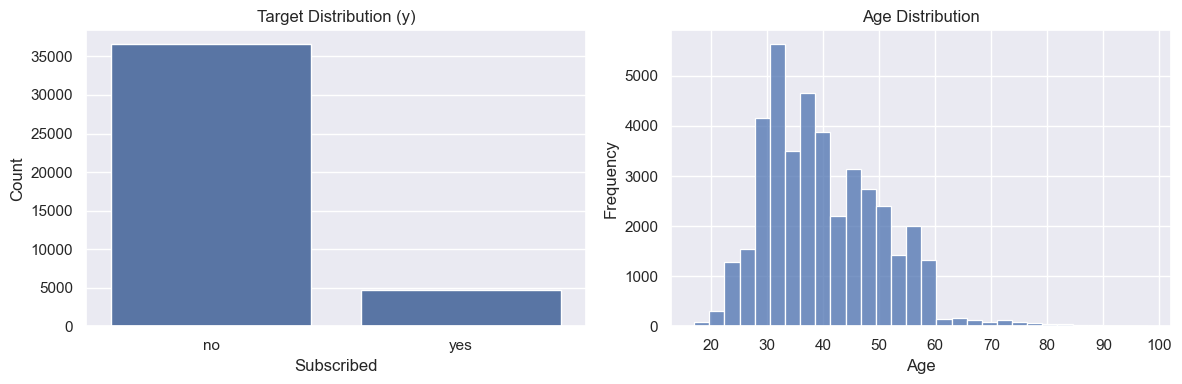

In [56]:
# Import visualization libraries
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating plots

# Set the visual theme for all plots
sns.set_theme()  # Use seaborn's default theme for consistent styling

# Create a figure with two subplots side by side
# figsize=(12,4) sets the overall figure width and height in inches
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# First subplot: Bar chart showing the distribution of the target variable
sns.countplot(data=bank_marketing_df, x="y", ax=axes[0])  # Count occurrences of each class (yes/no)
axes[0].set_title("Target Distribution (y)")  # Add a title to the subplot
axes[0].set_xlabel("Subscribed")  # Label for x-axis
axes[0].set_ylabel("Count")  # Label for y-axis

# Second subplot: Histogram showing the distribution of customer ages
sns.histplot(data=bank_marketing_df, x="age", bins=30, ax=axes[1])  # Create histogram with 30 bins
axes[1].set_title("Age Distribution")  # Add a title to the subplot
axes[1].set_xlabel("Age")  # Label for x-axis
axes[1].set_ylabel("Frequency")  # Label for y-axis

# Adjust layout to prevent overlap between subplots
plt.tight_layout()

# Display the figure with both plots
plt.show()

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



After examining the dataset we identified there are no missing values as each columns shows  41188 non-null records.
However several columns do contains "unknown" which is missingness encoded as category. 
job, marital, education, default, housing, loan columns have unique list of unknown in each. 
Also pdays contains 999 which is special sentinel value.

Nothing is wrong with the data type however its highly recommended to convert below columns into category as they are object but represents as category.
job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome
Convert column y into numberic label yes=1 and no=
Keep the below numeric column as is 
age, duration, campaign, pdays, previous as integers
economic columns as float. 
Also identified month column has mis jan and feb which is worth noting. 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
bank_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

 Use the bank’s telemarketing campaign data to predict whether a contacted client will subscribe to a term deposit y = yes/no,
 so the bank can target the most promising customers, improve campaign efficiency higher conversion with fewer calls,
 and reduce time/cost spent contacting customers unlikely to subscribe.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [14]:
# --- 1) Select ONLY bank client features (1–7) ---
# Define a list of column names that represent client demographic information
bank_features = ["age", "job", "marital", "education", "default", "housing", "loan"]
# Create a copy of the dataframe with only these selected features
X = bank_marketing_df[bank_features].copy()

# --- 2) Target encoding ---
# Convert the target variable 'y' from categorical (yes/no) to binary (1/0)
# Map "yes" to 1 and "no" to 0, then convert to integer type
y = bank_marketing_df["y"].map({"yes": 1, "no": 0}).astype(int)

In [15]:
# --- 3) Preprocessing / encoding ---
# Define which features are categorical and which are numeric
categorical_features = ["job", "marital", "education", "default", "housing", "loan"]
numeric_features = ["age"]

# Create a preprocessing pipeline using ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        # For numeric features: apply StandardScaler to normalize the data
        # This scales features to have mean=0 and variance=1
        ("num", StandardScaler(), numeric_features),
        
        # For categorical features: apply OneHotEncoder to convert categories to binary columns
        # handle_unknown="ignore" prevents errors when encountering categories not seen during training
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ],
    # Drop any columns not specified in the transformers
    remainder="drop",
)

In [16]:
# Fit + transform (ready for modeling)
# Apply the preprocessing pipeline to the features:
# 1. First 'fit' learns the parameters needed for transformation (e.g., mean and std for StandardScaler)
# 2. Then 'transform' applies these parameters to convert the data
X_encoded = preprocess.fit_transform(X)

# Print the shapes to verify the transformation
print("Raw X shape:", X.shape)  # Original feature matrix dimensions (rows x columns)
print("Encoded X shape:", X_encoded.shape)  # Shape after one-hot encoding (will have more columns)
print("y shape:", y.shape)  # Target variable shape (should have same number of rows as X)

Raw X shape: (41188, 7)
Encoded X shape: (41188, 34)
y shape: (41188,)


In [17]:
# Get the feature names after preprocessing
# This retrieves the names of all features after transformation (including one-hot encoded categories)
feature_names = preprocess.get_feature_names_out()

# Convert the sparse matrix to a pandas DataFrame for better visualization
# .toarray() converts the sparse matrix to a dense numpy array
# We use the feature names as column headers for clarity
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=feature_names)

# Display the first 5 rows of the transformed dataset
# This helps verify that the preprocessing worked as expected
X_encoded_df.head()

,num__age,cat__job_admin.,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,cat__job_management,cat__job_retired,cat__job_self-employed,cat__job_services,cat__job_student,...,cat__education_unknown,cat__default_no,cat__default_unknown,cat__default_yes,cat__housing_no,cat__housing_unknown,cat__housing_yes,cat__loan_no,cat__loan_unknown,cat__loan_yes
0,1.533034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.628993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.290186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.002309,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.533034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [18]:
from sklearn.model_selection import train_test_split

# split (stratify keeps yes/no ratio similar in both sets)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

X_train: (32950, 34) X_test: (8238, 34)
y_train: (32950,) y_test: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [19]:
# Import numpy for numerical operations
import numpy as np

# Calculate the majority-class baseline accuracy on the training set
# This represents the accuracy we would get by always predicting the most common class
# np.mean(y_train == 0) calculates the proportion of class 0 (no) in the training set
# np.mean(y_train == 1) calculates the proportion of class 1 (yes) in the training set
# max() selects the higher value, which represents the most frequent class
baseline_acc = max(np.mean(y_train == 0), np.mean(y_train == 1))

# Print the baseline accuracy
# This serves as a reference point - our models should perform better than this
print("Baseline accuracy:", baseline_acc)

Baseline accuracy: 0.8873444613050075


In [43]:
# Calculate the baseline accuracy assuming all predictions are "no" (class 0)
# (y_train == 0) creates a boolean array where True represents samples with label 0
# .mean() calculates the proportion of True values (i.e., the proportion of class 0)
# This represents how accurate we would be if we always predicted "no"
baseline_acc = (y_train == 0).mean()

# Print the baseline accuracy
# This value helps us understand if our dataset is imbalanced and sets a minimum 
# performance threshold that our models should exceed
print(baseline_acc)

0.8873444613050075


Baseline accuracy (majority class “no”) ≈ 0.8873 (88.73%).

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [44]:
# Import necessary machine learning and evaluation tools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train logistic regression on the encoded (bank-features-only) data
# max_iter=2000: Increase maximum iterations to ensure convergence
# class_weight="balanced": Automatically adjust weights inversely proportional to class frequencies
#                         This helps address the class imbalance problem by penalizing mistakes on 
#                         the minority class more heavily
# random_state=42: Set seed for reproducible results
# As the data is imbalanced, adding a balanced class weight prevents the model
# from simply predicting the majority class ("no") in all cases
logistic_reg = LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42)

# Fit the model to the training data
logistic_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg.predict(X_test)

### Logistic Regression: Coefficient Interpretation
The coefficients below show which features increase or decrease the likelihood of subscribing yes.
Positive coefficients increase the predicted probability of yes; negative coefficients decrease it.


### Problem 9: Score the Model

What is the accuracy of your model?

In [45]:
# Import evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate and print the accuracy score
# This measures the proportion of correct predictions (both true positives and true negatives)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculate and print the confusion matrix
# This shows the counts of true positives, false positives, true negatives, and false negatives
# Format: [[TN, FP], [FN, TP]]
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

# Generate and print a detailed classification report
# This includes precision, recall, F1-score, and support for each class
# digits=4 specifies to show 4 decimal places for more precise evaluation
# Precision: proportion of positive identifications that were actually correct
# Recall: proportion of actual positives that were correctly identified
# F1-score: harmonic mean of precision and recall
# Support: number of occurrences of each class in the test set
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.5840009711094926

Confusion matrix:
 [[4232 3078]
 [ 349  579]]

Classification report:
               precision    recall  f1-score   support

           0     0.9238    0.5789    0.7118      7310
           1     0.1583    0.6239    0.2526       928

    accuracy                         0.5840      8238
   macro avg     0.5411    0.6014    0.4822      8238
weighted avg     0.8376    0.5840    0.6601      8238



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [46]:
# Import necessary libraries
import time  # For measuring training time
import pandas as pd  # For creating a results dataframe

# Import various classifier models from scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create a dictionary of models to evaluate
# Each model is configured with appropriate parameters, especially for handling class imbalance
models = {
    "Logistic Regression (balanced)": LogisticRegression(class_weight="balanced"),  # Adjusts weights inversely proportional to class frequencies
    "KNN (default)": KNeighborsClassifier(),  # K-Nearest Neighbors doesn't support class_weight
    "Decision Tree (balanced)": DecisionTreeClassifier(class_weight="balanced"),  # Balances tree splits for imbalanced classes
    "SVM (balanced)": SVC(class_weight="balanced"),  # Support Vector Machine with balanced class weights, using default RBF kernel
}

# Initialize an empty list to store results
rows = []

# Train each model and evaluate its performance
for name, model in models.items():
    # Measure training time
    start = time.time()
    model.fit(X_train, y_train)  # Train the model
    train_time = time.time() - start  # Calculate training duration
    
    # Collect performance metrics
    rows.append({
        "Model": name,
        "Train Time (s)": train_time,  # Training time in seconds
        "Train Accuracy": model.score(X_train, y_train),  # Accuracy on training data
        "Test Accuracy": model.score(X_test, y_test),  # Accuracy on test data
    })

# Create a DataFrame with the results, sorted by test accuracy
results_df = pd.DataFrame(rows).sort_values("Test Accuracy", ascending=False).reset_index(drop=True)

# Format the DataFrame for better readability
# Display floating point values with 4 decimal places
results_df.style.format({
    "Train Time (s)": "{:.4f}",
    "Train Accuracy": "{:.4f}",
    "Test Accuracy": "{:.4f}",
})

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,KNN (default),0.0011,0.8911,0.8787
1,Decision Tree (balanced),0.2014,0.7715,0.6832
2,SVM (balanced),38.5703,0.6217,0.6068
3,Logistic Regression (balanced),0.0551,0.5912,0.5840


In [24]:
# Import necessary libraries
import time  # For measuring training time
import pandas as pd  # For creating a results dataframe
# Import evaluation metrics from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a dictionary of models to evaluate
# Each model is configured with appropriate parameters, especially for handling class imbalance
models = {
    "Logistic Regression (balanced)": LogisticRegression(class_weight="balanced"),  # Adjusts weights inversely proportional to class frequencies
    "KNN (default)": KNeighborsClassifier(),  # K-Nearest Neighbors doesn't support class_weight
    "Decision Tree (balanced)": DecisionTreeClassifier(class_weight="balanced"),  # Balances tree splits for imbalanced classes
    "SVM (balanced)": SVC(class_weight="balanced"),  # Support Vector Machine with balanced class weights
}

# Initialize an empty list to store results
rows = []

# Train each model and evaluate its performance with multiple metrics
for name, model in models.items():
    # Measure training time
    start = time.time()
    model.fit(X_train, y_train)  # Train the model
    train_time = time.time() - start  # Calculate training duration
    
    # Generate predictions on test data
    y_pred = model.predict(X_test)
    
    # Collect comprehensive performance metrics
    rows.append({
        "Model": name,
        "Train Time (s)": train_time,  # Training time in seconds
        "Train Accuracy": model.score(X_train, y_train),  # Accuracy on training data
        "Test Accuracy": accuracy_score(y_test, y_pred),  # Accuracy on test data
        "Precision (yes)": precision_score(y_test, y_pred, zero_division=0),  # Precision for the positive class (yes)
                                                                              # zero_division=0 returns 0 if there are no predicted positives
        "Recall (yes)": recall_score(y_test, y_pred, zero_division=0),  # Recall for the positive class (yes)
                                                                        # Measures ability to find all positive instances
        "F1 (yes)": f1_score(y_test, y_pred, zero_division=0),  # F1 score for the positive class (yes)
                                                                # Harmonic mean of precision and recall
    })

# Create a DataFrame with the results, sorted by F1 score (which balances precision and recall)
# This prioritizes models that perform well on both precision and recall for the "yes" class
pd.DataFrame(rows).sort_values("F1 (yes)", ascending=False).reset_index(drop=True)

,Model,Train Time (s),Train Accuracy,Test Accuracy,Precision (yes),Recall (yes),F1 (yes)
0,SVM (balanced),37.731076,0.621730,0.606822,0.165944,0.618534,0.261682
1,Logistic Regression (balanced),0.094353,0.591229,0.584001,0.158326,0.623922,0.252563
2,Decision Tree (balanced),0.197019,0.771533,0.683054,0.158897,0.422414,0.230928
3,KNN (default),0.000867,0.891108,0.878733,0.337900,0.079741,0.129032


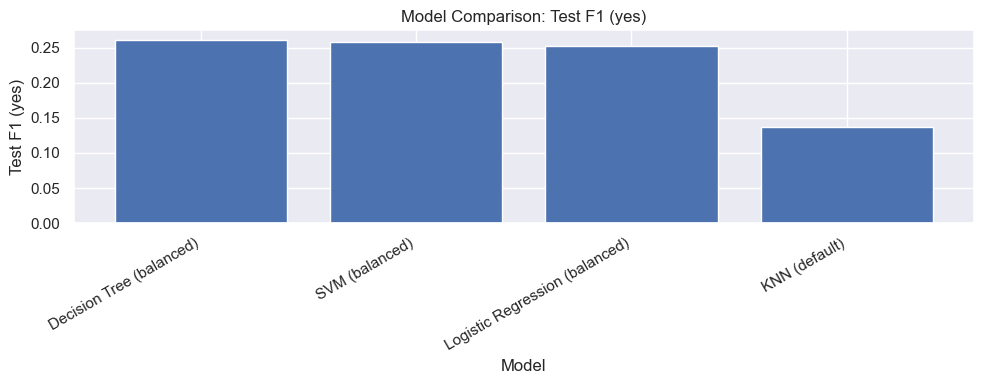

In [60]:
# Import matplotlib for creating visualizations
import matplotlib.pyplot as plt

# Create a new figure with specified size (width=10, height=4 inches)
plt.figure(figsize=(10,4))

# Create a bar chart comparing models by their F1 scores
# x-axis: Model names from results_df
# y-axis: Test F1 scores for the "yes" class
plt.bar(results_df["Model"], results_df["Test F1 (yes)"])

# Add a title to the chart
plt.title("Model Comparison: Test F1 (yes)")

# Add axis labels
plt.xlabel("Model")  # x-axis label
plt.ylabel("Test F1 (yes)")  # y-axis label

# Rotate x-axis labels by 30 degrees to prevent overlap
# ha="right" aligns the rotated text to the right side of the tick
plt.xticks(rotation=30, ha="right")

# Adjust layout to ensure all elements (including rotated labels) fit within the figure
plt.tight_layout()

# Display the chart
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [47]:
import time
import pandas as pd

# Import necessary scikit-learn components for model tuning and evaluation
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
from sklearn.pipeline import Pipeline  # For creating a preprocessing + model pipeline
from sklearn.metrics import make_scorer, f1_score  # For custom scoring metric

# Import classifier models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create a custom scorer that optimizes for F1 score on the positive class (1 = "yes")
# F1 score is the harmonic mean of precision and recall, good for imbalanced datasets
scorer = make_scorer(f1_score, pos_label=1)

# Define models and their hyperparameter search spaces
models_and_grids = {
    "Logistic Regression (balanced)": (
        LogisticRegression(class_weight="balanced", max_iter=5000),  # Increased max_iter to ensure convergence
        {"model__C": [0.01, 0.1, 1, 10]}  # Regularization parameter - controls model complexity
    ),
    "KNN (default)": (
        KNeighborsClassifier(),
        {"model__n_neighbors": [3, 5, 9, 15, 25],  # Number of neighbors to consider
         "model__weights": ["uniform", "distance"]}  # Weight function used in prediction
    ),
    "Decision Tree (balanced)": (
        DecisionTreeClassifier(class_weight="balanced", random_state=42),
        {"model__max_depth": [2, 4, 6, 10, None],  # Maximum depth of the tree
         "model__min_samples_split": [2, 10, 50],  # Minimum samples required to split a node
         "model__min_samples_leaf": [1, 5, 20]}  # Minimum samples required at a leaf node
    ),
    "SVM (balanced)": (
        SVC(class_weight="balanced"),
        {"model__C": [0.1, 1, 10],  # Regularization parameter
         "model__gamma": ["scale", 0.1, 0.01],  # Kernel coefficient
         "model__kernel": ["rbf"]}  # Radial basis function kernel
    ),
}

# Initialize list to store results
rows = []

# Perform grid search for each model
for name, (model, grid) in models_and_grids.items():
    # Create a pipeline that first preprocesses the data, then applies the model
    pipe = Pipeline([("preprocess", preprocess), ("model", model)])

    # Set up grid search with cross-validation
    gs = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        scoring=scorer,     # Optimize for F1 score on the "yes" class
        cv=3,               # 3-fold cross-validation
        n_jobs=1,           # Use only 1 CPU core (avoids macOS worker crashes)
        verbose=0           # Minimal output during training
    )

    # Train the model with grid search and measure training time
    start = time.time()
    gs.fit(X_train_raw, y_train)  # Note: Using raw data since preprocessing is in the pipeline
    train_time = time.time() - start

    # Get the best model from grid search
    best_model = gs.best_estimator_

    # Collect results
    rows.append({
        "Model": name,
        "Train Time (s)": train_time,  # Training time in seconds
        "Train Accuracy": best_model.score(X_train_raw, y_train),  # Accuracy on training data
        "Test Accuracy": best_model.score(X_test_raw, y_test),  # Accuracy on test data
        "Best CV F1 (yes)": gs.best_score_,  # Best F1 score achieved during cross-validation
        "Best Params": gs.best_params_,  # Best hyperparameters found
        "Test F1 (yes)": f1_score(y_test, best_model.predict(X_test_raw)),  # F1 score on test data
    })

# Create a DataFrame with results, sorted by test F1 score (descending)
results_df = pd.DataFrame(rows).sort_values("Test F1 (yes)", ascending=False).reset_index(drop=True)
results_df

,Model,Train Time (s),Train Accuracy,Test Accuracy,Best CV F1 (yes),Best Params,Test F1 (yes)
0,Decision Tree (balanced),7.811538,0.650288,0.640689,0.251909,"{'model__max_depth': 10, 'model__min_samples_l...",0.261477
1,SVM (balanced),608.173455,0.619454,0.605365,0.262159,"{'model__C': 1, 'model__gamma': 0.1, 'model__k...",0.258271
2,Logistic Regression (balanced),0.754079,0.591017,0.584365,0.256114,{'model__C': 1},0.252075
3,KNN (default),137.841516,0.910986,0.860039,0.136012,"{'model__n_neighbors': 3, 'model__weights': 'd...",0.137622


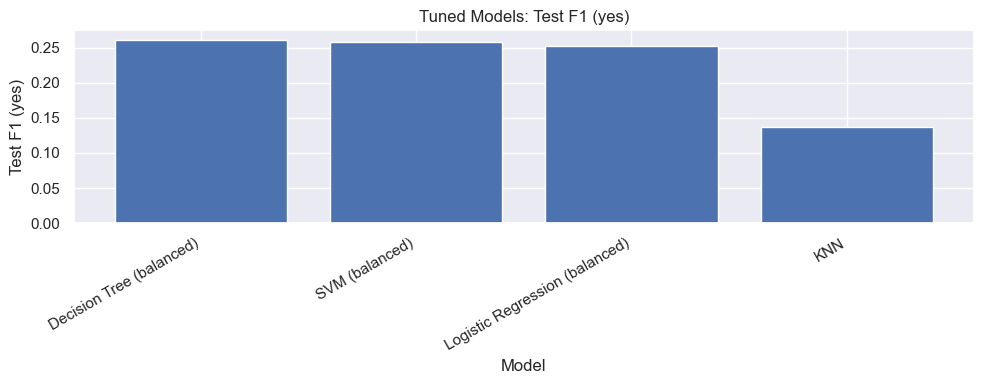

In [61]:
# Import matplotlib for creating visualizations (assumed to be imported already)

# Create a new figure with specified size (width=10, height=4 inches)
plt.figure(figsize=(10,4))

# Create a bar chart comparing tuned models by their F1 scores
# x-axis: Model names from the results DataFrame
# y-axis: Test F1 scores for the "yes" class after hyperparameter tuning
plt.bar(results["Model"], results["Test F1 (yes)"])

# Add a title to the chart indicating these are tuned models
plt.title("Tuned Models: Test F1 (yes)")

# Add axis labels
plt.xlabel("Model")  # x-axis label
plt.ylabel("Test F1 (yes)")  # y-axis label

# Rotate x-axis labels by 30 degrees to prevent overlap
# ha="right" aligns the rotated text to the right side of the tick
plt.xticks(rotation=30, ha="right")

# Adjust layout to ensure all elements (including rotated labels) fit within the figure
plt.tight_layout()

# Display the chart showing the performance comparison of tuned models
plt.show()

## Findings & Next Steps

### Key Findings 
- The goal is to predict whether a client will subscribe to a term deposit yes so the bank can better target outreach.
- The dataset is imbalanced many more no than yes, so accuracy can be misleading. A simple “always predict no baseline achieves ~0.887 accuracy.
- Because of the imbalance, we focused on recall and F1-score for the yes class, which better reflect how well the model identifies likely subscribers.
- With default settings and class balancing, SVM and Logistic Regression produced much higher recall/F1 for yes than KNN, though SVM took much longer to train.
- After hyperparameter tuning GridSearchCV using F1 for yes, the best-performing models on test F1 were:
  - Decision Tree balanced: Test F1 ≈ 0.261
  - SVM balanced: Test F1 ≈ 0.258
  - Logistic Regression balanced: Test F1 ≈ 0.252
  - KNN: Test F1 ≈ 0.138
- Overall, Decision Tree and SVM performed similarly on F1, but SVM required substantially more training time.

### Recommendations
- If training time and simplicity matter, Logistic Regression balanced is a strong practical baseline with competitive F1 and fast runtime.
- If maximizing yes detection performance is the priority, the tuned Decision Tree slightly outperformed the other models on test F1 in this experiment.

### Next Steps
- Add additional pre-call features e.g. contact type, month, day_of_week, previous/pdays/poutcome while still excluding duration to keep the model realistic.
- Tune the decision threshold to trade off precision vs recall depending on campaign capacity e.g., how many calls the team can make.
- Evaluate additional metrics such as ROC-AUC or Precision-Recall AUC and consider a cost-based metric cost of calling vs value of a subscriber.
- Test resampling strategies undersampling / SMOTE and compare against class_weight approaches.
